# WeatherPy Analysis

1. As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). As expected for this time of year, we see a clear difference between the Hemispheres, the North being significanlty cooler than the South as you climb higher in latitude.

2. Humidity aggregates strongly near 100%, meaning most cities are experiencing higher levels of humidity for this time of year, however it's fairly evenly balanced across the hempispheres, with the North being slighty more humid, perhaps due to increased rain and percipitation.

3. There is no strong relationship between latitude and cloudiness. But there does seem to be a strong aggregation near zero degrees and 80 degrees latitude.

4. There is no strong relationship between latitude and wind speed. However, the levels aggregate strongly between 0 and 5 mph.

In [199]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import csv
import requests
import datetime
from datetime import datetime as dt 
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_cityData = "Resources/cityData.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Define URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [200]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

622


In [201]:
# Initilize counters
counter = 1
group = 1

In [202]:
weatherData = []

names = []

cloudiness = []

countries = []

dates = []

humidities = []

lats = []

lngs = []

maxTemps = []

windSpeeds = []

#Begin Log
print(f'Beginning Data Retrieval')
print("-----------------------------")

for city in cities:
    
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    
    # Only allow 50 records to return  per set 
    if counter == 51:
        counter = 1
        group += 1
    
    try: 
        
    # Get weather data
        weather_response = requests.get(query_url).json()
        
    # log city calls
        print(f'Processing Record {counter} of Set {group} | {city}')
        print(f'{query_url}')

    # Append JSON City Data to List
        weatherData.append(weather_response)
    
    # Append key data for each city to associated list
        names.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        countries.append(weather_response["sys"]["country"])
        dates.append(weather_response["dt"])
        humidities.append(weather_response["main"]["humidity"])
        lats.append(weather_response["coord"]["lat"])
        lngs.append(weather_response["coord"]["lon"])
        maxTemps.append(weather_response["main"]["temp_max"])
        windSpeeds.append(weather_response["wind"]["speed"])
        
        counter += 1
        
    except:
    # Log error
        print(f'City not found. Skipping...')
        
# End Log
print("-----------------------------")
print(f'Data Retrieval Complete')
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=santa vitoria do palmar
Processing Record 2 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=atuona
Processing Record 3 of Set 1 | neubrandenburg
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=neubrandenburg
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=punta arenas
Processing Record 5 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=busselton
Processing Record 6 of Set 1 | torres
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=torres
Processing Record 7 of Set 1 | new norfolk
http://api.openweathermap.org/data/2

Processing Record 5 of Set 2 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=noyabrsk
Processing Record 6 of Set 2 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=lagoa
Processing Record 7 of Set 2 | karasuk
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=karasuk
Processing Record 8 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=hobart
Processing Record 9 of Set 2 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=clyde river
Processing Record 10 of Set 2 | slyudyanka
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=slyudyanka
Processing Record 11 of Set 2 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=yar-sale
Processing Record 12 of Set 2 | alice spr

Processing Record 6 of Set 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=ponta do sol
Processing Record 7 of Set 3 | nicolas de pierola
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=nicolas de pierola
Processing Record 8 of Set 3 | san fernando
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=san fernando
Processing Record 9 of Set 3 | sahuaripa
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=sahuaripa
Processing Record 10 of Set 3 | oyama
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=oyama
Processing Record 11 of Set 3 | riberalta
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=riberalta
Processing Record 12 of Set 3 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=carnarvon
Pr

Processing Record 9 of Set 4 | lewisporte
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=lewisporte
Processing Record 10 of Set 4 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=kulhudhuffushi
Processing Record 11 of Set 4 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=maldonado
Processing Record 12 of Set 4 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=kiama
Processing Record 13 of Set 4 | russell
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=russell
Processing Record 14 of Set 4 | liverpool
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=liverpool
Processing Record 15 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=barentsburg
City not found. S

Processing Record 11 of Set 5 | kenai
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=kenai
Processing Record 12 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=kavieng
Processing Record 13 of Set 5 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=cayenne
Processing Record 14 of Set 5 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=te anau
Processing Record 15 of Set 5 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=mar del plata
Processing Record 16 of Set 5 | tokur
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=tokur
Processing Record 17 of Set 5 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=cherskiy
Processing Record 18 of Set 5 | mizque
htt

Processing Record 12 of Set 6 | macaboboni
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=macaboboni
City not found. Skipping...
Processing Record 12 of Set 6 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=los llanos de aridane
Processing Record 13 of Set 6 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=nanortalik
Processing Record 14 of Set 6 | tukrah
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=tukrah
City not found. Skipping...
Processing Record 14 of Set 6 | parabel
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=parabel
Processing Record 15 of Set 6 | gat
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=gat
Processing Record 16 of Set 6 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=f

Processing Record 14 of Set 7 | nizwa
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=nizwa
Processing Record 15 of Set 7 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=lavrentiya
Processing Record 16 of Set 7 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=ahipara
Processing Record 17 of Set 7 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=san policarpo
Processing Record 18 of Set 7 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=havre-saint-pierre
Processing Record 19 of Set 7 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=saldanha
Processing Record 20 of Set 7 | faya
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=faya
Processing Recor

Processing Record 12 of Set 8 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=deputatskiy
Processing Record 13 of Set 8 | matara
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=matara
Processing Record 14 of Set 8 | bulgan
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=bulgan
Processing Record 15 of Set 8 | safaga
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=safaga
City not found. Skipping...
Processing Record 15 of Set 8 | shenzhen
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=shenzhen
Processing Record 16 of Set 8 | nacogdoches
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=nacogdoches
Processing Record 17 of Set 8 | illimo
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=illimo
City not f

Processing Record 12 of Set 9 | dullewala
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=dullewala
Processing Record 13 of Set 9 | barroquinha
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=barroquinha
Processing Record 14 of Set 9 | atar
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=atar
Processing Record 15 of Set 9 | bobrovka
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=bobrovka
Processing Record 16 of Set 9 | college
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=college
Processing Record 17 of Set 9 | kundiawa
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=kundiawa
Processing Record 18 of Set 9 | khudumelapye
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=khudumelapye
Processing Record 19 of Set 

Processing Record 19 of Set 10 | puebloviejo
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=puebloviejo
Processing Record 20 of Set 10 | concordia
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=concordia
Processing Record 21 of Set 10 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=nabire
Processing Record 22 of Set 10 | basoko
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=basoko
Processing Record 23 of Set 10 | murgab
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=murgab
Processing Record 24 of Set 10 | anloga
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=anloga
Processing Record 25 of Set 10 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=petropavlovsk-kamchatskiy
P

Processing Record 26 of Set 11 | sawtell
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=sawtell
Processing Record 27 of Set 11 | coruripe
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=coruripe
Processing Record 28 of Set 11 | mantua
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=mantua
Processing Record 29 of Set 11 | temaraia
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=temaraia
City not found. Skipping...
Processing Record 29 of Set 11 | bara
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=bara
Processing Record 30 of Set 11 | quepos
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=quepos
Processing Record 31 of Set 11 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=f829854e55f7a67c207e0adb25ea894c&q=vardo
Processing Record 32 of

In [203]:
# Create Df of City Weather Data
city_df = pd.DataFrame({"City": names,
                        "Cloudiness": cloudiness,
                        "Country": countries,
                        "Date": dates,
                        "Humidity": humidities,
                        "Lat": lats,
                        "Lng": lngs,
                        "Max Temp": maxTemps,
                        "Wind Speed": windSpeeds
                       })

# Display City Data Counts
city_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [204]:
# Export DF to CSV
cityData_csv = city_df.to_csv(output_cityData)

In [205]:
# Display DF
city_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
555,Nagaur,32,IN,1547943717,74,27.20,73.74,284.982,1.22
556,Kaliningrad,75,RU,1547942400,86,54.71,20.51,274.150,5.00
557,Kirundo,75,BI,1547942400,88,-2.59,30.09,291.150,2.60
558,Ashington,75,GB,1547941800,93,55.18,-1.57,275.150,1.77
559,Volchansk,32,RU,1547943718,69,59.94,60.08,267.207,2.77


In [206]:
# Convert Temp from Kelvin to Fahrenhiet
temp_k = city_df["Max Temp"]
temp_f = round(((temp_k - 273.15) * 9/5) + 32, 2)

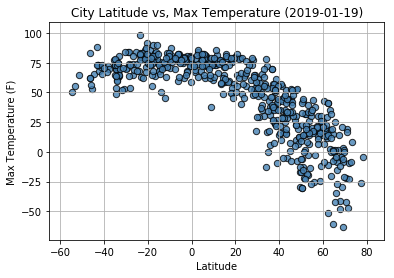

In [207]:
#Latitude vs. Max Temp Plot  
lat_x = city_df["Lat"]
temp_y = temp_f

plt.scatter(lat_x, temp_y, s=40, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')

# Set the upper and lower limits of our x and y axis
plt.xlim(round(min(lat_x)) - 10, round(max(lat_x)) + 10)
plt.ylim(round(min(temp_y)) - 10, round(max(temp_y)) + 10)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs, Max Temperature (" + str(datetime.date.today()) + ")", fontdict={"fontsize": "12", "fontweight": "medium"})
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save Figure
plt.savefig("Images/LatitudevsTemperatureScatter.png")

plt.show()

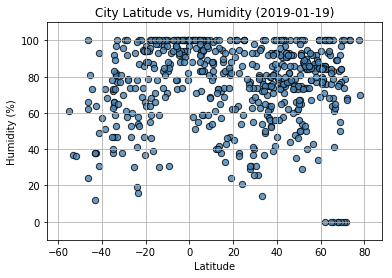

In [208]:
#Latitude vs. Humidity Plot  
lat_x = city_df["Lat"]
hum_y = city_df["Humidity"]

plt.scatter(lat_x, hum_y, s=40, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')

# Set the upper and lower limits of our x and y axis
plt.xlim(round(min(lat_x)) - 10, round(max(lat_x)) + 10)
plt.ylim(round(min(hum_y)) - 10, round(max(hum_y)) + 10)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs, Humidity (" + str(datetime.date.today()) + ")", fontdict={"fontsize": "12", "fontweight": "medium"})
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.savefig("Images/LatitudevsHumidityScatter.png")

plt.show()

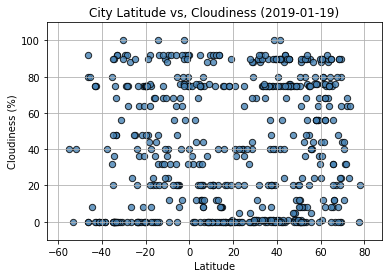

In [209]:
#Latitude vs. Cloudiness Plot  
lat_x = city_df["Lat"]
cloud_y = city_df["Cloudiness"]

plt.scatter(lat_x, cloud_y, s=40, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')

# Set the upper and lower limits of our x and y axis
plt.xlim(round(min(lat_x)) - 10, round(max(lat_x)) + 10)
plt.ylim(round(min(cloud_y)) - 10, round(max(cloud_y)) + 10)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs, Cloudiness (" + str(datetime.date.today()) + ")", fontdict={"fontsize": "12", "fontweight": "medium"})
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save Figure
plt.savefig("Images/LatitudevsCloudinessScatter.png")

plt.show()

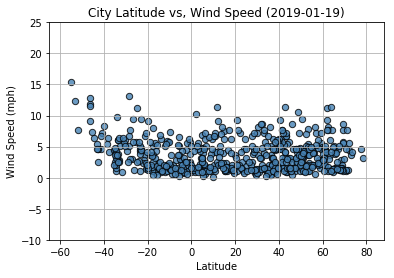

In [210]:
#Latitude vs. Wind Speed Plot  
lat_x = city_df["Lat"]
wind_y = city_df["Wind Speed"]

plt.scatter(lat_x, wind_y, s=40, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')

# Set the upper and lower limits of our x and y axis
plt.xlim(round(min(lat_x)) - 10, round(max(lat_x)) + 10)
plt.ylim(round(min(wind_y)) - 10, round(max(wind_y)) + 10)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs, Wind Speed (" + str(datetime.date.today()) + ")", fontdict={"fontsize": "12", "fontweight": "medium"})
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("Images/LatitudevsWindSpeedScatter.png")

plt.show()